## AUTO REGRESSIVE Models

Auto-regressive (AR) and moving average (MA) models are popular models that are frequently used for forecasting.

AR and MA models are combined to create models such as auto-regressive moving average (ARMA) and auto-regressive integrated moving average (ARIMA) models. 

The initial ARMA and ARIMA models were developed by Box and Jenkins in 1970.

ARMA models are basically regression models; auto-regression means regression of a variable on itself measured at different time periods. 

The main assumption of AR model is that the time series data is stationary.

A stationary time series is one whose statistical properties such as mean, variance, autocorrelation, etc. are all constant over time.

http://people.duke.edu/~rnau/411diff.htm

When the time series data is not stationary, then we convert the non-stationary data before applying AR models. 

### Lags

Taking the difference between consecutive observations is called a lag-1 difference.

For time series with a seasonal component, the lag may be expected to be the period (width) of the seasonality.

**White noise of the residuals:**

White noise is a process of residuals $\epsilon_t$ that are uncorrelated and follow normal distribution with mean 0 and constant standard deviation. In AR models, one of the main assumptions is the errors follow a white noise.

### Auto-Regressive  (AR) Models

Auto-Regression is a regression of a variable on itself measured at different time points. 
Auto-Regressive model with lag 1, AR(1) is given by 
* $Y_{t+1} = \beta Y_t + \epsilon_{t+1}$  and this same as
* $Y_{t+1} - \mu = \beta (Y_t - \mu) + \epsilon_{t+1}$  and this same as
* where $\epsilon_{t+1}$ is a sequence of uncorrelated residuals that follow normal distribution with zero mean and constant deviation. 
 * $Y_{t+1} - \mu$ is interpreted as a deviation from mean value $mu$ and known as mean centered series.



The Augmented Dickey Fuller Test (ADF) is unit root test for stationarity. 
The null hypothesis is that time series is non-stationary.
Alternative hypothesis is that time series is stationary.

### AR Model indentification


### Auto-Correlation Function (ACF) or correlogram and Partial Auto-Correlation Function (PACF)

#### Autocorrelation Function (ACF)

**A plot of auto-correlation of different lags is called ACF.**

The plot summarizes the correlation of an observation with lag values. The x-axis shows the lag and the y-axis shows the correlation coeﬃcient between -1 and 1 for negative and positive correlation.

#### Partial Autocorrelation Function (PACF)

**A plot of partial auto-correlation for different values of lags is called PACF.**

The plot summarizes the correlations for an observation with lag values that is not accounted for by prior lagged observations.

Both plots are drawn as bar charts showing the 95% and 99% conﬁdence intervals as horizontal lines. Bars that cross these conﬁdence intervals are therefore more signiﬁcant and worth noting. Some useful patterns you may observe on these plots are:

The number of lags is p when:
* The partial auto-correlation, |$\rho_{pk}$| > 1.96 / $\sqrt{n}$ for first p values and cuts off to zero. 
* The auto-correlation function, $\rho_k$ decreases exponentially.

*  The model is AR of order p when the PACF cuts-off after a lag p.

*  The model is MA of order p when the ACF cuts-off after a lag q.

*  The model is a mix of AR and MA if both the PACF and ACF trail oﬀ and cuts-off at p and q respectively.

* For an **ARIMA (p,d,q)** process, it becomes non-stationary to stationary after differencing it for **d** times.

#### Import the necessary libraries.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib
import sklearn
import statsmodels
import warnings

In [2]:
warnings.filterwarnings("ignore")

#### Read the data set in a Time Series with proper Time frequency or period.

In [3]:
df = pd.read_csv('MaunaLoa.csv',parse_dates=True,index_col='Year-Month')
df.head()

,CO2 ppm
Year-Month,
1965-01-01,319.32
1965-02-01,320.36
1965-03-01,320.82
1965-04-01,322.06
1965-05-01,322.17


# Plot the Time Series Data.

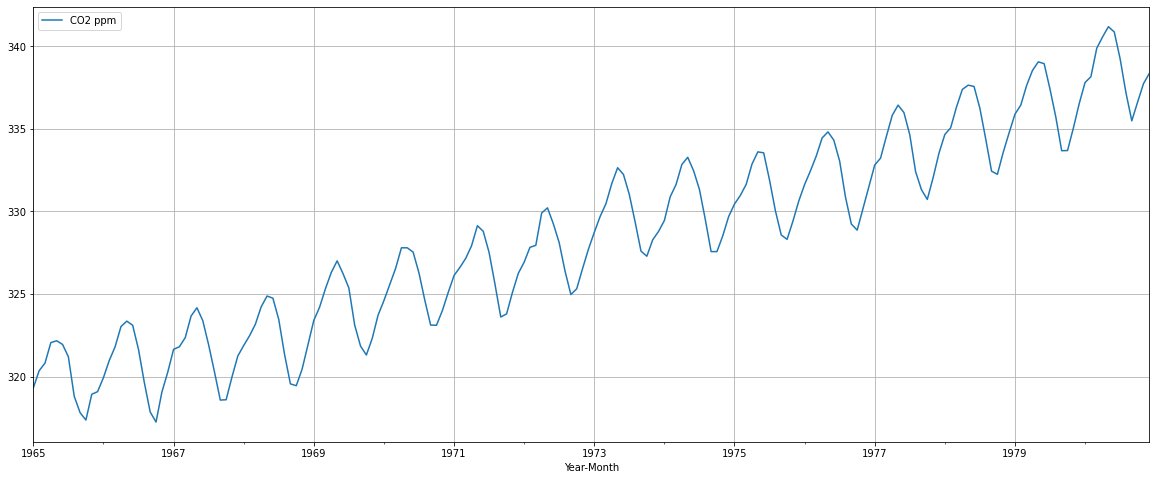

In [4]:
from pylab import rcParams
rcParams['figure.figsize'] = 20,8
df.plot(grid=True);

# Plot a boxplot to understand the variation of Carbon Dioxide in parts per million with respect to months across years.

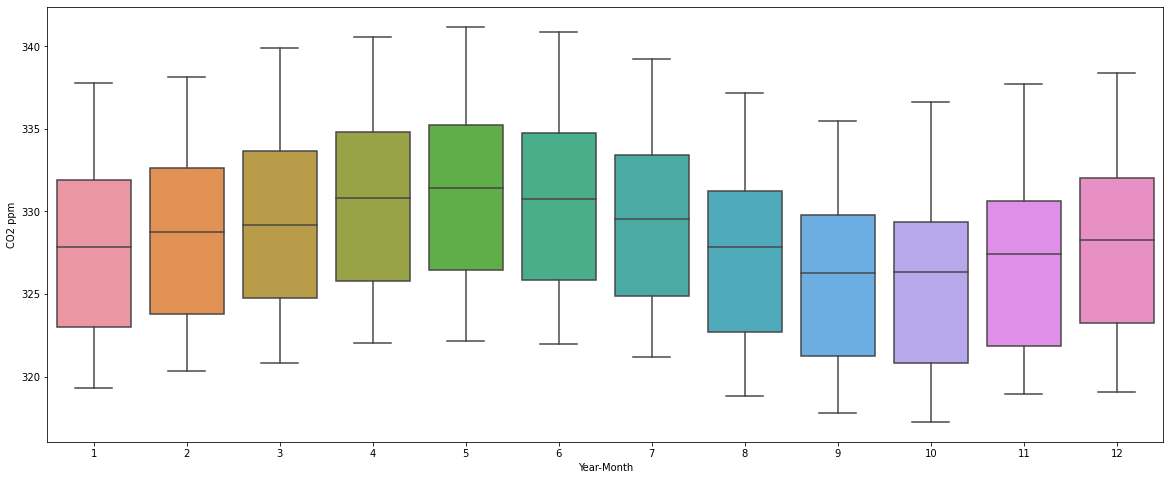

In [5]:
sns.boxplot(x=df.index.month,y=df['CO2 ppm']);

# Plot a boxplot to understand the variation of Carbon Dioxide in parts per million across years.

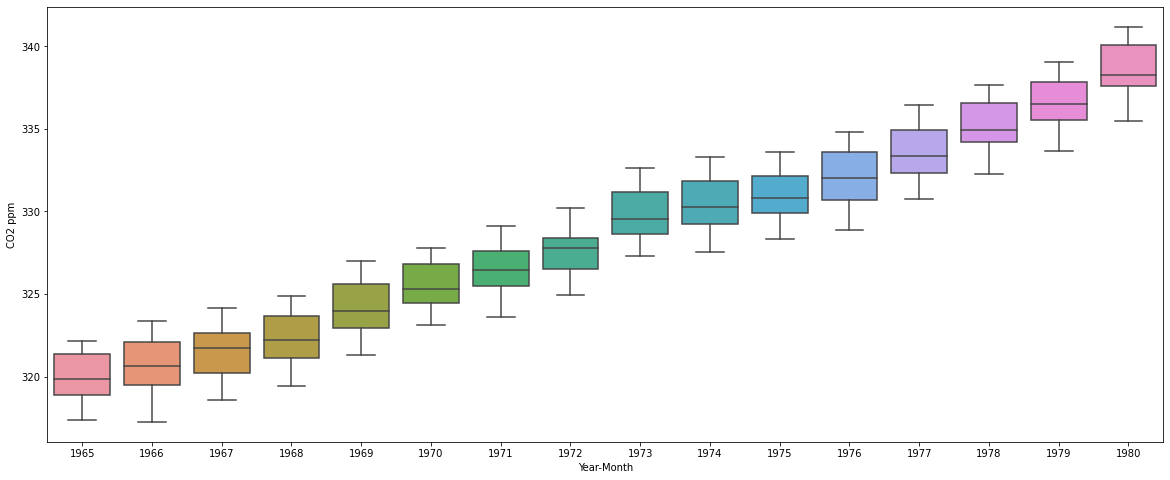

In [6]:
sns.boxplot(x=df.index.year,y=df['CO2 ppm']);

# Plot a graph of monthly Carbon Dioxide in parts per million across years.

In [8]:
monthly_CO2_across_years = pd.pivot_table(data=df,values='CO2 ppm',columns=df.index.month_name(),index=df.index.year)
monthly_CO2_across_years

Year-Month,April,August,December,February,January,July,June,March,May,November,October,September
Year-Month,,,,,,,,,,,,
1965,322.06,318.81,319.09,320.36,319.32,321.20,321.95,320.82,322.17,318.93,317.37,317.82
1966,323.03,319.64,320.26,320.98,319.94,321.65,323.11,321.81,323.36,319.06,317.25,317.86
1967,323.67,320.29,321.25,321.81,321.65,321.93,323.39,322.36,324.17,319.98,318.60,318.58
1968,324.23,321.34,321.92,322.47,321.88,323.47,324.75,323.17,324.88,320.45,319.45,319.56
1969,326.31,323.12,323.72,324.21,323.40,325.37,326.24,325.33,327.01,322.31,321.31,321.85
1970,327.80,324.63,325.09,325.57,324.60,326.28,327.54,326.55,327.80,323.99,323.11,323.12
1971,327.92,325.62,326.25,326.61,326.12,327.52,328.80,327.16,329.14,325.10,323.80,323.61
1972,329.91,326.39,327.71,327.83,326.93,328.11,329.25,327.95,330.22,326.54,325.32,324.97
1973,331.69,329.36,328.79,329.69,328.73,331.03,332.24,330.47,332.65,328.28,327.29,327.60


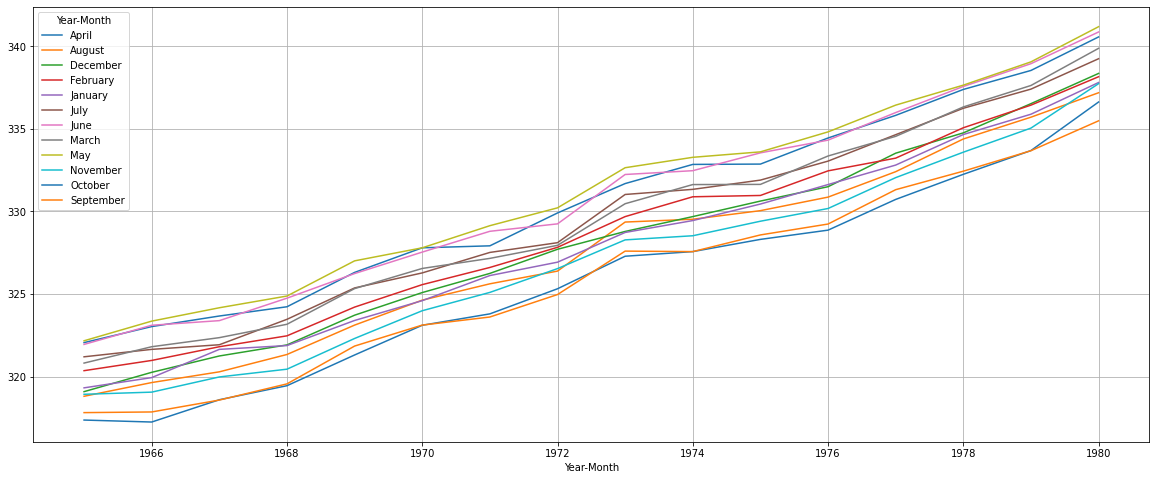

In [9]:
monthly_CO2_across_years.plot();
plt.grid();

# Decompose the Time Series to understand the various components.

In [10]:
from statsmodels.tsa.seasonal import seasonal_decompose

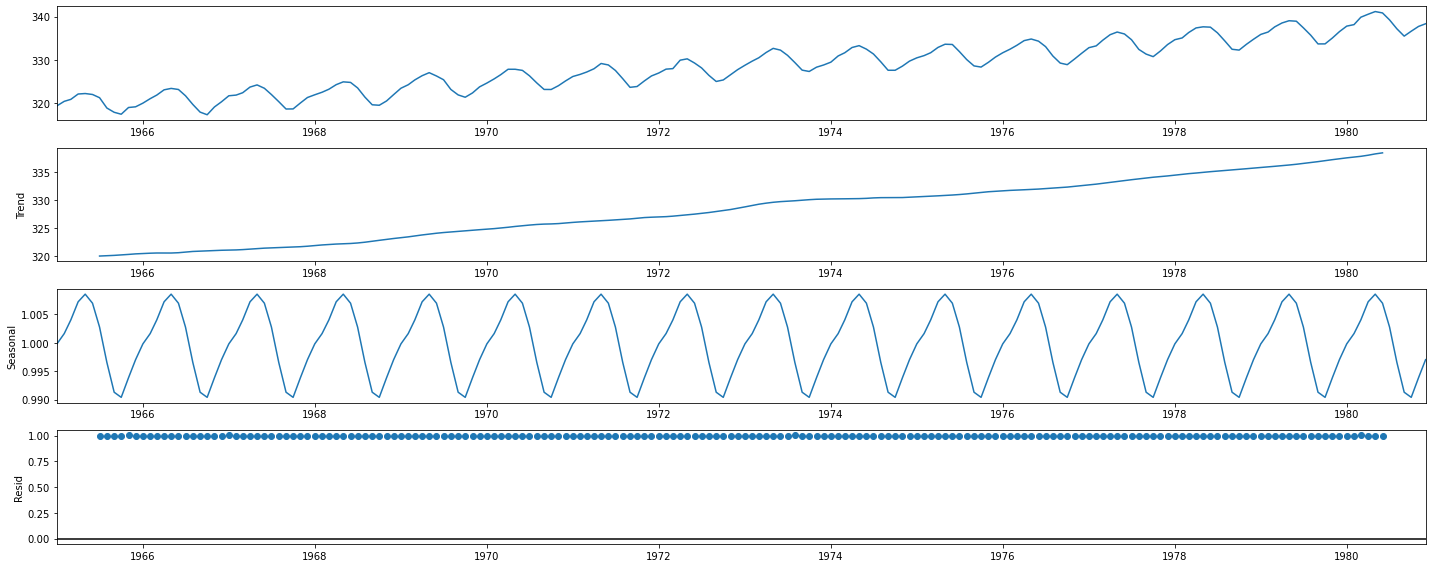

In [12]:
df_decomp = seasonal_decompose(df,model='multiplicative')
df_decomp.plot();

# Plot a graph of the average and percentage change of Carbon Dioxide in parts per million across years.

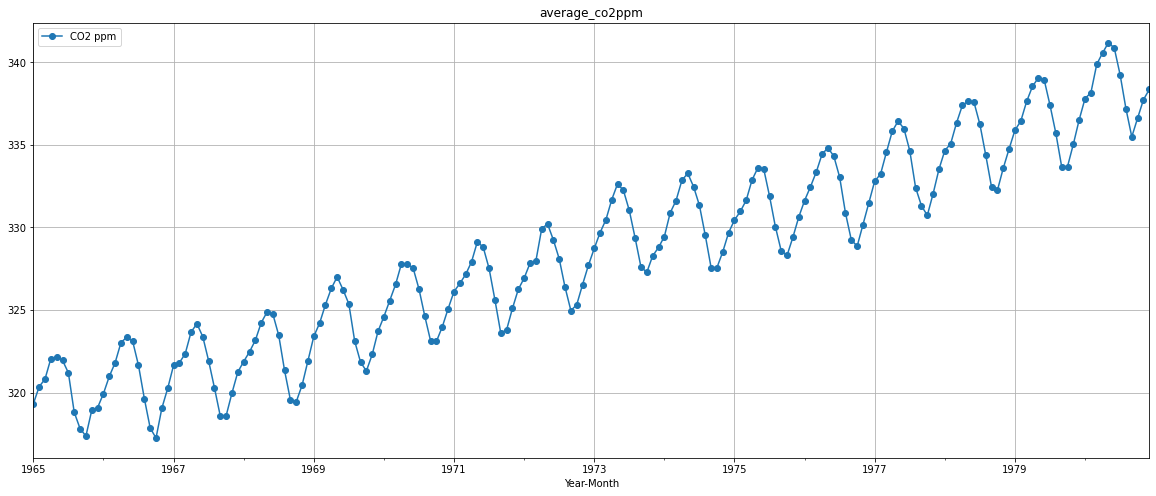

In [14]:
df.groupby(df.index)["CO2 ppm"].mean().plot(grid=True,legend=True,marker='o',title="average_co2ppm");

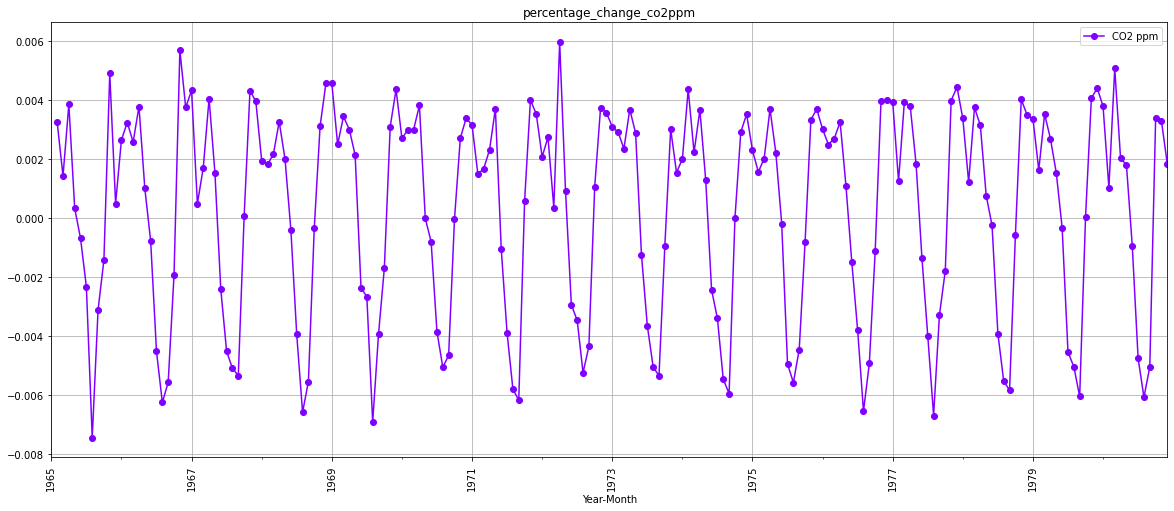

In [20]:
df.groupby(df.index)["CO2 ppm"].sum().pct_change().plot(grid=True,legend=True,marker='o',title="percentage_change_co2ppm",rot=90,colormap='rainbow');

# Split the data into train and test. The first 75% of the data should be in training and last 25% of the data should be in test

In [29]:
train    =   df[0:int(len(df)*0.75)] 
test     =   df[int(len(df)*0.75):]

In [30]:
train.head()

,CO2 ppm
Year-Month,
1965-01-01,319.32
1965-02-01,320.36
1965-03-01,320.82
1965-04-01,322.06
1965-05-01,322.17


In [31]:
train.tail()

,CO2 ppm
Year-Month,
1976-08-01,330.87
1976-09-01,329.24
1976-10-01,328.87
1976-11-01,330.18
1976-12-01,331.50


In [32]:
test.head()

,CO2 ppm
Year-Month,
1977-01-01,332.81
1977-02-01,333.23
1977-03-01,334.55
1977-04-01,335.82
1977-05-01,336.44


In [33]:
test.tail()

,CO2 ppm
Year-Month,
1980-08-01,337.19
1980-09-01,335.49
1980-10-01,336.63
1980-11-01,337.74
1980-12-01,338.36


# Test the training data for stationarity using the Augmented Dickey-Fuller (ADF) test at $\alpha$ = 0.05. 
# If the data is non-stationary, use appropriate measures to stationarize the data and then check for stationarity using the Augmented Dickey-Fuller (ADF) Test at $\alpha$ = 0.05.

In [34]:
from statsmodels.tsa.stattools import adfuller

In [35]:
dftest = adfuller(train,regression='ct')
print('DF test statistic is %3.3f' %dftest[0])
print('DF test p-value is' ,dftest[1])
print('Number of lags used' ,dftest[2])

DF test statistic is -2.350
DF test p-value is 0.40654710002449357
Number of lags used 13


p-value of the train data is more than 0.05 so we failed to reject the NULL hypothesis, means train data is not stationary

##### Going forward, for all the questions 'training data' means the data on which the model will be built and which is stationary in nature.

# Check the ACF and PACF of the training data.

In [37]:
dftest = adfuller(train.diff(periods=2).dropna(),regression='ct')
print('DF test statistic is %3.3f' %dftest[0])
print('DF test p-value is' ,dftest[1])
print('Number of lags used' ,dftest[2])

DF test statistic is -4.192
DF test p-value is 0.004598884622951062
Number of lags used 10


In [38]:
train_diff = train.diff(periods=2).dropna()
train_diff

,CO2 ppm
Year-Month,
1965-03-01,1.50
1965-04-01,1.70
1965-05-01,1.35
1965-06-01,-0.11
1965-07-01,-0.97
...,...
1976-08-01,-3.45
1976-09-01,-3.81
1976-10-01,-2.00


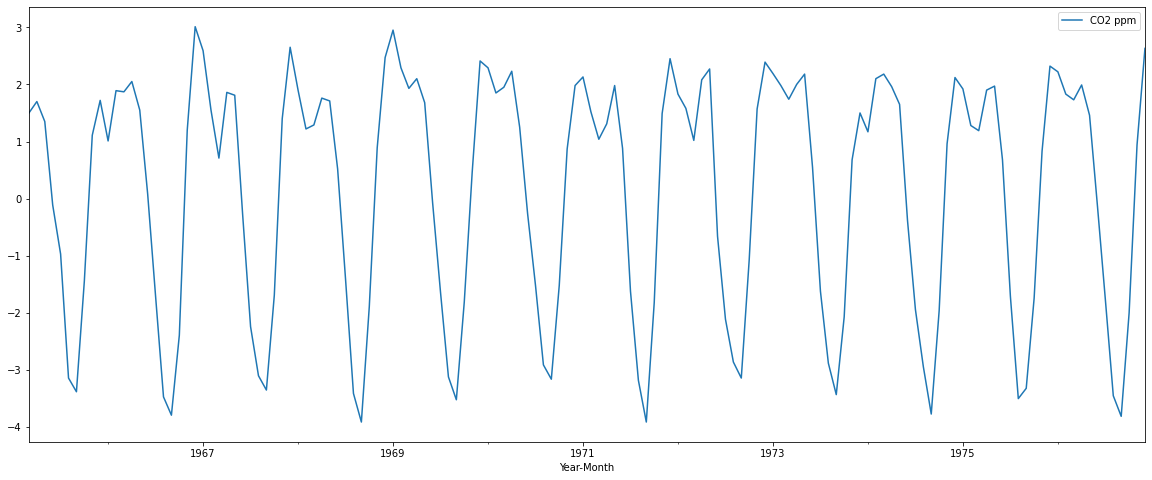

In [39]:
train_diff.plot();

In [40]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

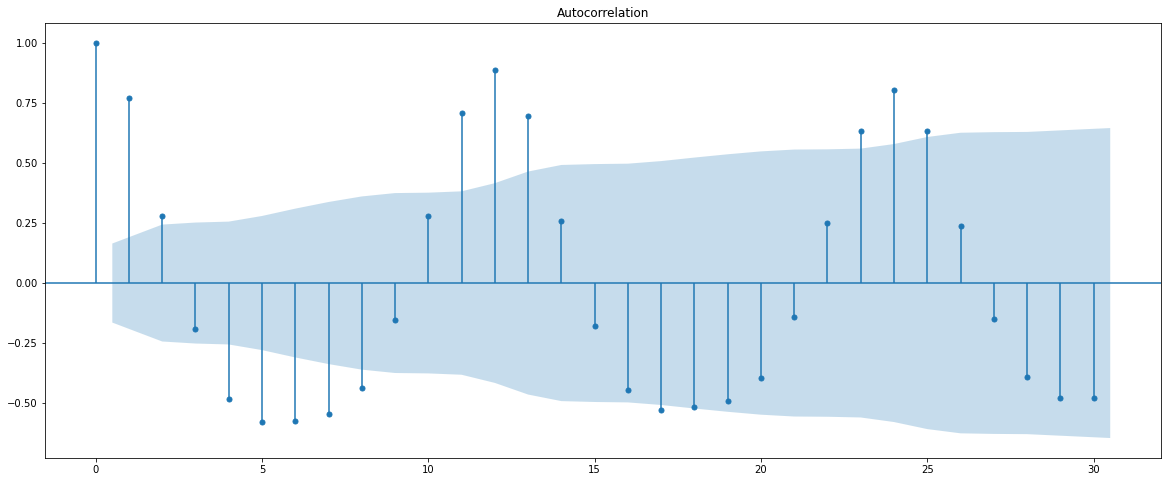

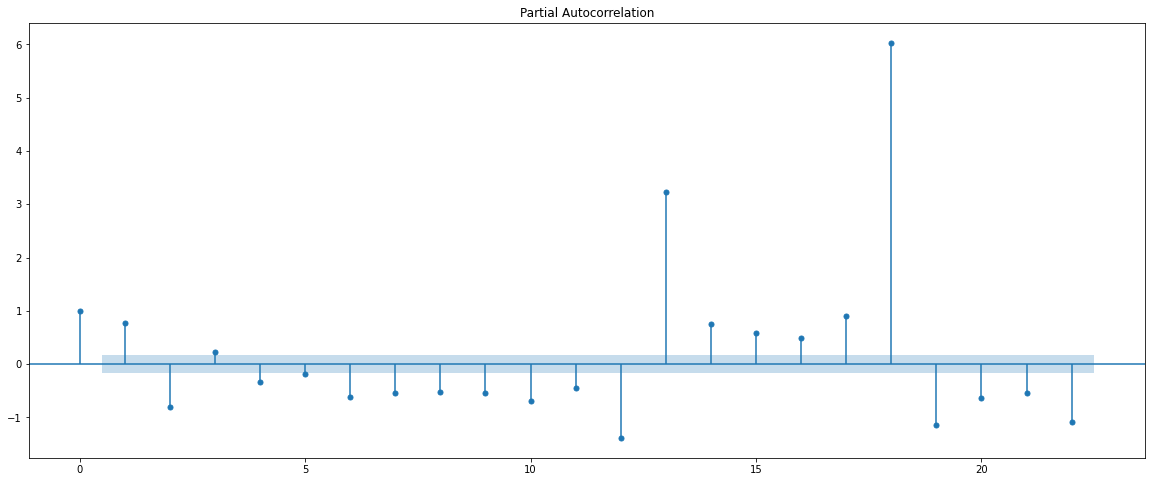

In [41]:
plot_acf(train_diff,lags=30)
plot_pacf(train_diff);

# Build an Automated version of an ARIMA model on the training data for which the best parameters are selected in accordance with the lowest Akaike Information Criteria (AIC). 
[Here we have taken the range of values of p and q to be between 0 and 2]

In [42]:
import itertools
p = q = range(0, 3)
d= range(1,3)
pdq = list(itertools.product(p, d, q))
print('Some parameter combinations for the Model...')
for i in range(1,len(pdq)):
    print('Model: {}'.format(pdq[i]))

Some parameter combinations for the Model...
Model: (0, 1, 1)
Model: (0, 1, 2)
Model: (0, 2, 0)
Model: (0, 2, 1)
Model: (0, 2, 2)
Model: (1, 1, 0)
Model: (1, 1, 1)
Model: (1, 1, 2)
Model: (1, 2, 0)
Model: (1, 2, 1)
Model: (1, 2, 2)
Model: (2, 1, 0)
Model: (2, 1, 1)
Model: (2, 1, 2)
Model: (2, 2, 0)
Model: (2, 2, 1)
Model: (2, 2, 2)


In [43]:
# Creating an empty Dataframe with column names only
ARIMA_AIC = pd.DataFrame(columns=['param', 'AIC'])
ARIMA_AIC

,param,AIC


In [44]:
from statsmodels.tsa.arima.model import ARIMA

for param in pdq:
    ARIMA_model = ARIMA(train['CO2 ppm'].values,order=param).fit()
    print('ARIMA{} - AIC:{}'.format(param,ARIMA_model.aic))
    ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)

ARIMA(0, 1, 0) - AIC:444.7122352680342
ARIMA(0, 1, 1) - AIC:363.9233961269523
ARIMA(0, 1, 2) - AIC:333.3929524233261
ARIMA(0, 2, 0) - AIC:371.026683117119
ARIMA(0, 2, 1) - AIC:365.1819750811708
ARIMA(0, 2, 2) - AIC:363.56289429520876
ARIMA(1, 1, 0) - AIC:352.7724961797355
ARIMA(1, 1, 1) - AIC:338.1074239288134
ARIMA(1, 1, 2) - AIC:327.2524301980193
ARIMA(1, 2, 0) - AIC:364.6858675097875
ARIMA(1, 2, 1) - AIC:366.56469834465554
ARIMA(1, 2, 2) - AIC:341.21291832552697
ARIMA(2, 1, 0) - AIC:320.97281967644403
ARIMA(2, 1, 1) - AIC:285.0008293101954
ARIMA(2, 1, 2) - AIC:286.52001300824514
ARIMA(2, 2, 0) - AIC:366.2545276359286
ARIMA(2, 2, 1) - AIC:324.65092802841866
ARIMA(2, 2, 2) - AIC:326.31898539804763


In [45]:
ARIMA_AIC.sort_values(by='AIC',ascending=True)

,param,AIC
13,"(2, 1, 1)",285.000829
14,"(2, 1, 2)",286.520013
12,"(2, 1, 0)",320.972820
16,"(2, 2, 1)",324.650928
17,"(2, 2, 2)",326.318985
8,"(1, 1, 2)",327.252430
2,"(0, 1, 2)",333.392952
7,"(1, 1, 1)",338.107424
11,"(1, 2, 2)",341.212918
6,"(1, 1, 0)",352.772496


In [46]:
mod = ARIMA(train['CO2 ppm'], order=(2,1,1))

results_Arima = mod.fit()

print(results_Arima.summary())

                               SARIMAX Results                                
Dep. Variable:                CO2 ppm   No. Observations:                  144
Model:                 ARIMA(2, 1, 1)   Log Likelihood                -138.500
Date:                Sun, 30 Jan 2022   AIC                            285.001
Time:                        16:13:51   BIC                            296.852
Sample:                    01-01-1965   HQIC                           289.817
                         - 12-01-1976                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.5291      0.054     28.213      0.000       1.423       1.635
ar.L2         -0.8274      0.054    -15.320      0.000      -0.933      -0.722
ma.L1         -0.8291      0.066    -12.484      0.0

# Predict on the Test Set using this model and evaluate the model on the test set using RMSE and MAPE

In [47]:
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean((np.abs(y_true-y_pred))/(y_true))*100

## Importing the mean_squared_error function from sklearn to calculate the RMSE

from sklearn.metrics import mean_squared_error

In [48]:
predicted_autoARIMA = results_Arima.forecast(steps=len(test))
predicted_autoARIMA

1977-01-01    332.717760
1977-02-01    333.487603
1977-03-01    333.657145
1977-04-01    333.279400
1977-05-01    332.561515
1977-06-01    331.776372
1977-07-01    331.169826
1977-08-01    330.892019
1977-09-01    330.969104
1977-10-01    331.316837
1977-11-01    331.784765
1977-12-01    332.212538
1978-01-01    332.479459
1978-02-01    332.533652
1978-03-01    332.395658
1978-04-01    332.139816
1978-05-01    331.862793
1978-06-01    331.650895
1978-07-01    331.556103
1978-08-01    331.586489
1978-09-01    331.711384
1978-10-01    331.877217
1978-11-01    332.027445
1978-12-01    332.119942
1979-01-01    332.137073
1979-02-01    332.086734
1979-03-01    331.995587
1979-04-01    331.897868
1979-05-01    331.823866
1979-06-01    331.791567
1979-07-01    331.803409
1979-08-01    331.848244
1979-09-01    331.906999
1979-10-01    331.959744
1979-11-01    331.991779
1979-12-01    331.997120
1980-01-01    331.978781
1980-02-01    331.946319
1980-03-01    331.911857
1980-04-01    331.886022


In [50]:
rmse = mean_squared_error(test['CO2 ppm'],predicted_autoARIMA,squared=False)
mape = mean_absolute_percentage_error(test['CO2 ppm'],predicted_autoARIMA)
print('RMSE:',rmse,'\nMAPE:',mape)

RMSE: 4.753883490262536 
MAPE: 1.192602674995597


In [51]:
resultsDf = pd.DataFrame({'RMSE': rmse,'MAPE':mape}
                           ,index=['ARIMA(2,1,1)'])

resultsDf

,RMSE,MAPE
"ARIMA(2,1,1)",4.753883,1.192603


# Check for stationarity on the whole data and stationarize the data if needed. Build a model on the whole data using the parameters got from best fit (with respect to the lowest AIC value) ARIMA model.
### Note: Stationarity is to be checked with the Augmented Dickey-Fuller (ADF) test at $\alpha$ = 0.05.

In [52]:
dftest = adfuller(df,regression='ct')
print('DF test statistic is %3.3f' %dftest[0])
print('DF test p-value is' ,dftest[1])
print('Number of lags used' ,dftest[2])

DF test statistic is -2.364
DF test p-value is 0.3986575883707837
Number of lags used 14


In [53]:
dftest = adfuller(df.diff().dropna(),regression='ct')
print('DF test statistic is %3.3f' %dftest[0])
print('DF test p-value is' ,dftest[1])
print('Number of lags used' ,dftest[2])

DF test statistic is -4.965
DF test p-value is 0.00023772430755328338
Number of lags used 11


In [54]:
full_model_autoARIMA = ARIMA(df['CO2 ppm'], order=(2,1,1))

results_Arima_full_model = full_model_autoARIMA.fit()

print(results_Arima_full_model.summary())

                               SARIMAX Results                                
Dep. Variable:                CO2 ppm   No. Observations:                  192
Model:                 ARIMA(2, 1, 1)   Log Likelihood                -190.652
Date:                Sun, 30 Jan 2022   AIC                            389.305
Time:                        16:23:49   BIC                            402.314
Sample:                    01-01-1965   HQIC                           394.574
                         - 12-01-1980                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.5236      0.047     32.128      0.000       1.431       1.617
ar.L2         -0.8195      0.051    -16.209      0.000      -0.919      -0.720
ma.L1         -0.8203      0.061    -13.461      0.0

# Forecast the values for the next 24 months using the ARIMA model just built and plot them along with confidence intervals. Also, plot the existing time series data in this graph.

In [56]:
pred_dynamic = results_Arima_full_model.get_prediction(start=pd.to_datetime('1981-01-01'), dynamic=True, full_results=True)

In [57]:
pred_dynamic_ci = pred_dynamic.conf_int()

In [58]:
pred95 = results_Arima_full_model.get_forecast(steps=24, alpha=0.05)
pred_ci_95 = pred95.conf_int()

In [59]:
forecast_fullmodel_autoarima = pred95.predicted_mean

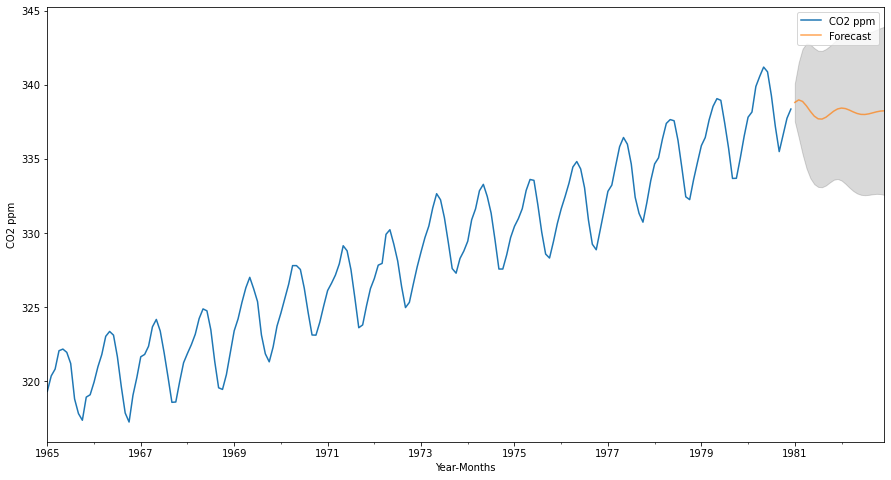

In [62]:
axis = df.plot(label='Observed', figsize=(15, 8))
forecast_fullmodel_autoarima.plot(ax=axis, label='Forecast', alpha=0.7)
axis.fill_between(forecast_fullmodel_autoarima.index, pred_ci_95['lower CO2 ppm'], pred_ci_95['upper CO2 ppm'], color='k', alpha=.15)
axis.set_xlabel('Year-Months')
axis.set_ylabel('CO2 ppm')
plt.legend(loc='best')
plt.show()

# Build an Automated version of an SARIMA model on the training data for which the best parameters are selected in accordance with the lowest Akaike Information Criteria (AIC). 
[Here we have taken the range of values of p,q,P and Q to be between 0 and 2]

In [64]:
import itertools
p = q = range(0, 3)
d= range(1,2)
D = range(0,1)
pdq = list(itertools.product(p, d, q))
model_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, D, q))]
print('Examples of some parameter combinations for Model...')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], model_pdq[i]))

Examples of some parameter combinations for Model...
Model: (0, 1, 1)(0, 0, 1, 12)
Model: (0, 1, 2)(0, 0, 2, 12)
Model: (1, 1, 0)(1, 0, 0, 12)
Model: (1, 1, 1)(1, 0, 1, 12)
Model: (1, 1, 2)(1, 0, 2, 12)
Model: (2, 1, 0)(2, 0, 0, 12)
Model: (2, 1, 1)(2, 0, 1, 12)
Model: (2, 1, 2)(2, 0, 2, 12)


In [65]:
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC

,param,seasonal,AIC


In [66]:
import statsmodels.api as sm

for param in pdq:
    for param_seasonal in model_pdq:
        SARIMA_model = sm.tsa.statespace.SARIMAX(train['CO2 ppm'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA = SARIMA_model.fit(maxiter=1000)
        print('SARIMA{}x{}7 - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)

SARIMA(0, 1, 0)x(0, 0, 0, 12)7 - AIC:441.78062205228605
SARIMA(0, 1, 0)x(0, 0, 1, 12)7 - AIC:322.9968747866852
SARIMA(0, 1, 0)x(0, 0, 2, 12)7 - AIC:232.00849360950713
SARIMA(0, 1, 0)x(1, 0, 0, 12)7 - AIC:151.72863156969532
SARIMA(0, 1, 0)x(1, 0, 1, 12)7 - AIC:90.95070209889634
SARIMA(0, 1, 0)x(1, 0, 2, 12)7 - AIC:62.41395044653089
SARIMA(0, 1, 0)x(2, 0, 0, 12)7 - AIC:93.02503211873353
SARIMA(0, 1, 0)x(2, 0, 1, 12)7 - AIC:66.07400567055078
SARIMA(0, 1, 0)x(2, 0, 2, 12)7 - AIC:62.91057997767077
SARIMA(0, 1, 1)x(0, 0, 0, 12)7 - AIC:358.6597354199761
SARIMA(0, 1, 1)x(0, 0, 1, 12)7 - AIC:284.8604635310402
SARIMA(0, 1, 1)x(0, 0, 2, 12)7 - AIC:209.13648709009507
SARIMA(0, 1, 1)x(1, 0, 0, 12)7 - AIC:151.7343684527607
SARIMA(0, 1, 1)x(1, 0, 1, 12)7 - AIC:84.83368672041428
SARIMA(0, 1, 1)x(1, 0, 2, 12)7 - AIC:65.43056355060338
SARIMA(0, 1, 1)x(2, 0, 0, 12)7 - AIC:92.63486093513409
SARIMA(0, 1, 1)x(2, 0, 1, 12)7 - AIC:63.535256365887136
SARIMA(0, 1, 1)x(2, 0, 2, 12)7 - AIC:63.876337336464026
SARI

In [67]:
SARIMA_AIC.sort_values(by=['AIC']).head()

,param,seasonal,AIC
32,"(1, 1, 0)","(1, 0, 2, 12)",62.004003
5,"(0, 1, 0)","(1, 0, 2, 12)",62.413950
8,"(0, 1, 0)","(2, 0, 2, 12)",62.910580
34,"(1, 1, 0)","(2, 0, 1, 12)",63.434248
16,"(0, 1, 1)","(2, 0, 1, 12)",63.535256


In [68]:
import statsmodels.api as sm

mod = sm.tsa.statespace.SARIMAX(train['CO2 ppm'],
                                order=(1,1,0),
                                seasonal_order=(1, 0, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_SARIMA = mod.fit()
print(results_SARIMA.summary())

                                        SARIMAX Results                                        
Dep. Variable:                                 CO2 ppm   No. Observations:                  144
Model:             SARIMAX(1, 1, 0)x(1, 0, [1, 2], 12)   Log Likelihood                 -26.002
Date:                                 Sun, 30 Jan 2022   AIC                             62.004
Time:                                         17:44:04   BIC                             75.857
Sample:                                     01-01-1965   HQIC                            67.629
                                          - 12-01-1976                                         
Covariance Type:                                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1409      0.096     -1.466      0.143      -0.329       0

# Predict on the Test Set using this model and evaluate the model on the test set using RMSE and MAPE

In [69]:
predicted_autoSARIMA = results_SARIMA.forecast(steps=len(test))
predicted_autoSARIMA

1977-01-01    332.381547
1977-02-01    333.136754
1977-03-01    333.801929
1977-04-01    334.976757
1977-05-01    335.545634
1977-06-01    335.078717
1977-07-01    333.867769
1977-08-01    332.097327
1977-09-01    330.496924
1977-10-01    330.391975
1977-11-01    331.495489
1977-12-01    332.606049
1978-01-01    333.518582
1978-02-01    334.271173
1978-03-01    334.959317
1978-04-01    336.116901
1978-05-01    336.661315
1978-06-01    336.199474
1978-07-01    334.983840
1978-08-01    333.177746
1978-09-01    331.586617
1978-10-01    331.449619
1978-11-01    332.568583
1978-12-01    333.696874
1979-01-01    334.600282
1979-02-01    335.348697
1979-03-01    336.032506
1979-04-01    337.182925
1979-05-01    337.723963
1979-06-01    337.264984
1979-07-01    336.056886
1979-08-01    334.261987
1979-09-01    332.680721
1979-10-01    332.544572
1979-11-01    333.656600
1979-12-01    334.777897
1980-01-01    335.675706
1980-02-01    336.419481
1980-03-01    337.099052
1980-04-01    338.242340


In [70]:
rmse = mean_squared_error(test['CO2 ppm'],predicted_autoSARIMA,squared=False)
mape = mean_absolute_percentage_error(test['CO2 ppm'],predicted_autoSARIMA)
print('RMSE:',rmse,'\nMAPE:',mape)

RMSE: 1.5276193259890591 
MAPE: 0.40438570640251953


In [71]:
temp_resultsDf = pd.DataFrame({'RMSE': [rmse],'MAPE':[mape]}
                           ,index=['SARIMA(1, 1, 0)(1,0,2)12'])

resultsDf = pd.concat([resultsDf, temp_resultsDf])
resultsDf

,RMSE,MAPE
"ARIMA(2,1,1)",4.753883,1.192603
"SARIMA(1, 1, 0)(1,0,2)12",1.527619,0.404386


# Build a model on the whole data using the parameters got from best fit (with respect to the lowest AIC value) SARIMA model.

In [72]:
import statsmodels.api as sm

mod = sm.tsa.statespace.SARIMAX(df['CO2 ppm'],
                                order=(1,1,0),
                                seasonal_order=(1, 0, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_SARIMA_fullmodel = mod.fit()
print(results_SARIMA_fullmodel.summary())

                                        SARIMAX Results                                        
Dep. Variable:                                 CO2 ppm   No. Observations:                  192
Model:             SARIMAX(1, 1, 0)x(1, 0, [1, 2], 12)   Log Likelihood                 -45.995
Date:                                 Sun, 30 Jan 2022   AIC                            101.990
Time:                                         17:49:33   BIC                            117.550
Sample:                                     01-01-1965   HQIC                           108.306
                                          - 12-01-1980                                         
Covariance Type:                                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2290      0.082     -2.798      0.005      -0.389      -0

# Forecast the values for the next 24 months using the SARIMA model built and plot them along with confidence intervals. Also, plot the existing time series data in this graph.

In [73]:
predicted_manual_SARIMA_12_full_data = results_SARIMA_fullmodel.get_forecast(steps=24)

In [74]:
predicted_manual_SARIMA_12_full_data.summary_frame(alpha=0.05)

CO2 ppm,mean,mean_se,mean_ci_lower,mean_ci_upper
1981-01-01,339.568099,0.305354,338.969617,340.166580
1981-02-01,340.169192,0.385454,339.413717,340.924668
1981-03-01,341.217911,0.460154,340.316025,342.119797
1981-04-01,342.303623,0.522562,341.279420,343.327826
1981-05-01,342.846587,0.578636,341.712482,343.980692
1981-06-01,342.481833,0.629660,341.247723,343.715943
1981-07-01,341.107300,0.676864,339.780670,342.433929
1981-08-01,339.181404,0.720981,337.768306,340.594501
1981-09-01,337.489419,0.762551,335.994847,338.983992
1981-10-01,337.503522,0.801969,335.931693,339.075352


In [77]:
rmse_full_data = mean_squared_error(df['CO2 ppm'],results_SARIMA_fullmodel.fittedvalues,squared=False)
rmse_full_data

25.807992275106827

In [79]:
pred_full_manual_SARIMA_data = predicted_manual_SARIMA_12_full_data.summary_frame(alpha=0.05).set_index(pd.date_range(start='1981-01-01',periods=24, freq='M'))

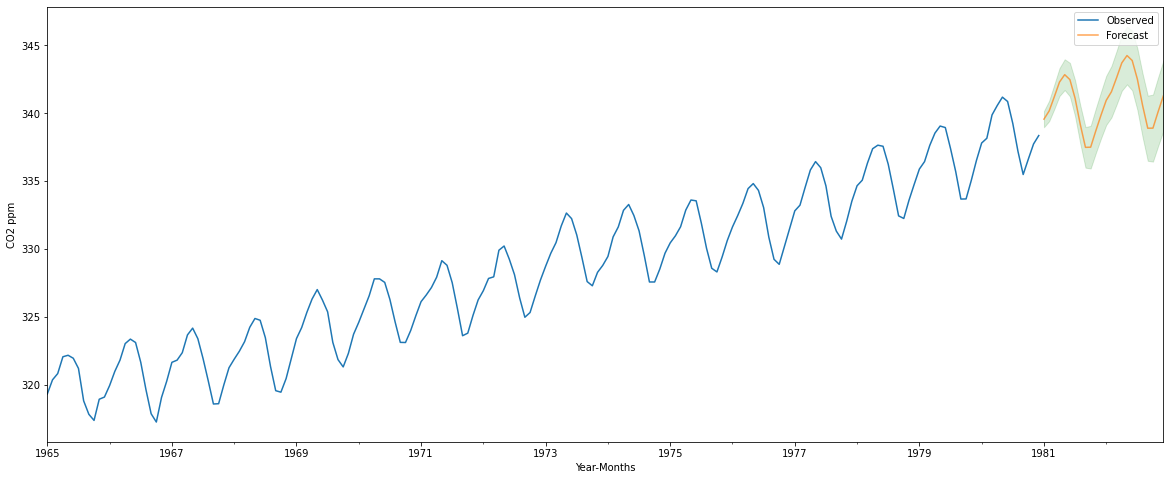

In [80]:
axis = df['CO2 ppm'].plot(label='Observed')

pred_full_manual_SARIMA_data['mean'].plot(ax=axis, label='Forecast', alpha=0.7)

axis.fill_between(pred_full_manual_SARIMA_data.index, 
                  pred_full_manual_SARIMA_data['mean_ci_lower'], 
                  pred_full_manual_SARIMA_data['mean_ci_upper'], 
                  color='green', alpha=.15)

axis.set_xlabel('Year-Months')
axis.set_ylabel('CO2 ppm')
plt.legend(loc='best')
plt.show()

# Build a model on the whole data using the parameters got from best fit (with respect to the lowest AIC value) SARIMA model. Consider a degree of differencing on the Seasonal scale as well.

# Predict on the Test Set using this model and evaluate the model on the test set using RMSE and MAPE

# Build a model on the whole data using the parameters got from best fit (with respect to the lowest AIC value) SARIMA model.

# Forecast the values for the next 24 months using the SARIMA model built and plot them along with confidence intervals. Also, plot the existing time series data in this graph.

# END